### Desempenho de estudantes em exames

O dataset está disponivel no kaggle https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

O dataset contem informações como genero, raça(grupos), nivel de educação dos pais, almoço, se o aluno realizou curso de preparação para o teste e a pontual nos teste de matemática, leitura e escrita.

Algumas perguntas que queremos responder ao análisar esses dados são:

1. Qual eficaz é o curso de preparação para o teste ?
2. Quais os principais fatores que contribuem para os resultados dos testes ?
3. Qual seria a melhor forma de melhorar as notas dos alunos em cada teste ?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Primeiro podemos procurar pelos valores médio, máximo e minimo de cada coluna númerica

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Podemos observar que, metade dos alunos tiraram notas ate 66 pontos em matemática, 70 em leitura e 69 na prova de escrita.

Para analisar quem passaria ou não nas provas, vamos adotar que o minimo para se considerado como aprovado é de 60 pontos.

In [16]:
nota_corte = 60 #definida a nota de corte

#filtrar o dataset e para quem tiver math score > 60 será atribuida a categoria "Aprovado"
df['math_situation'] = np.where(df['math score']>= 60, 'Aprovado', 'Reprovado')

#E vamos fazer isso para todas as outras provas
df['reading_situation'] = np.where(df['reading score']>= 60, 'Aprovado', 'Reprovado')
df['writing_situation'] = np.where(df['writing score']>= 60, 'Aprovado', 'Reprovado')

### Vamos primeiro observar como estão distribuidas as notas das provas:

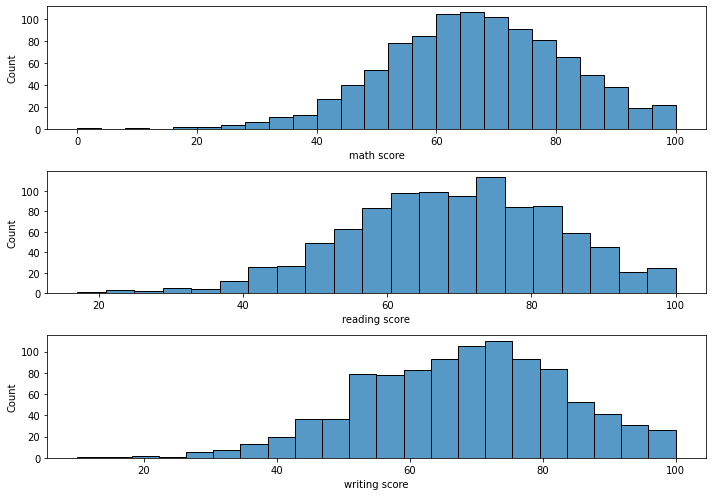

In [5]:
fig, axes = plt.subplots(3,1, figsize=(10,7))

sns.histplot(data=df, x='math score',ax=axes[0])
sns.histplot(data=df, x='reading score',ax=axes[1])
sns.histplot(data=df, x='writing score',ax=axes[2])
plt.tight_layout();

Vemos que as notas estão concentradas entre 50 e 90 pontos.

Mas quantos foram aprovados em cada prova ?

In [7]:
math = df['math_situation'].value_counts()
reading = df['reading_situation'].value_counts()
writing = df['writing_situation'].value_counts()
print(f'Na prova de matematica a situação dos alunos foi:\n{math}')
print(f'\nNa prova de leitura a situação dos alunos foi:\n{reading}')
print(f'\nNa prova de escrita a situação dos alunos foi:\n{writing}')

Na prova de matematica a situação dos alunos foi:
Aprovado     677
Reprovado    323
Name: math_situation, dtype: int64

Na prova de leitura a situação dos alunos foi:
Aprovado     746
Reprovado    254
Name: reading_situation, dtype: int64

Na prova de escrita a situação dos alunos foi:
Aprovado     719
Reprovado    281
Name: writing_situation, dtype: int64


Aqui podemos inferir que, os alunos apresentam maior aprovação nas provas de escrita e leitura, diferente de matemática onde a quantidade de aprovados é menor.

### Quantos alunos foram aprovados em todos as provas?

In [8]:
df['OverAll_situation'] = df.apply(lambda df: 'Reprovado' if df['math_situation']=='Reprovado' or  df['reading_situation']=='Reprovado' or df['writing_situation']=='Reprovado' else 'Aprovado', axis=1)
df['OverAll_situation'].value_counts()

Aprovado     603
Reprovado    397
Name: OverAll_situation, dtype: int64

Assim, de todos os alunos, 603 foram aprovados em todos os teste tirando pontuação maior que 60 em cada.

### O tipo de preparação ajuda a melhorar o desempenho nas provas ?

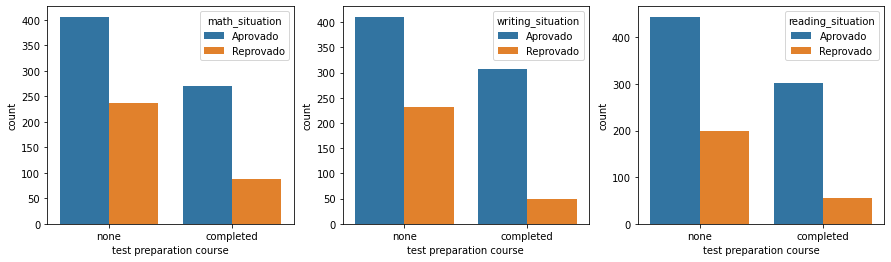

In [9]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

sns.countplot(x='test preparation course', data=df, hue='math_situation', ax=axes[0])
sns.countplot(x='test preparation course', data=df, hue='writing_situation', ax=axes[1])
sns.countplot(x='test preparation course', data=df, hue='reading_situation', ax=axes[2]);

Analisando as imagens acima podemos observar que, <b>os alunos que completaram o teste de preparação não possuem um número maior de aprovados</b>, quando comparados com os que não terminaram. <b>Entretanto, podemos inferir que para aqueles alunos que completaram o curso de preparação a quantidade de aprovado é muito maior que os reprovados</b>. Monstrando assim a eficiência do curso de preparação.

Abaixo temos a porcentagem de cada teste levando em conta se foi completado o curso de preparação ou não. <b>É evidente a eficácia do curso, uma vez que pelo menos 75% dos alunos são aprovados após completado o curso de preparação.</b>

In [13]:
df.groupby('test preparation course')['math_situation'].value_counts(normalize=True)
df.groupby('test preparation course')['reading_situation'].value_counts(normalize=True)
df.groupby('test preparation course')['writing_situation'].value_counts(normalize=True)

test preparation course  math_situation
completed                Aprovado          0.756983
                         Reprovado         0.243017
none                     Aprovado          0.632399
                         Reprovado         0.367601
Name: math_situation, dtype: float64

test preparation course  reading_situation
completed                Aprovado             0.843575
                         Reprovado            0.156425
none                     Aprovado             0.691589
                         Reprovado            0.308411
Name: reading_situation, dtype: float64

test preparation course  writing_situation
completed                Aprovado             0.860335
                         Reprovado            0.139665
none                     Aprovado             0.640187
                         Reprovado            0.359813
Name: writing_situation, dtype: float64

### O tipo de educação dos pais influenciam no resultado das provas ?

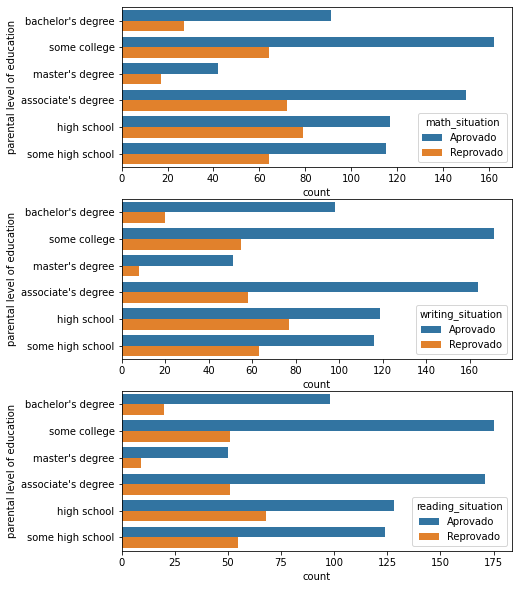

In [133]:
fig, axes = plt.subplots(3,1,figsize=(7,10))

sns.countplot(y='parental level of education', data=df, hue='math_situation', ax=axes[0])
sns.countplot(y='parental level of education', data=df, hue='writing_situation', ax=axes[1])
sns.countplot(y='parental level of education', data=df, hue='reading_situation', ax=axes[2])
plt.tight_layout;

Podemos ver que para todas as provas os grupos de "some college" e "associate's degree" apresentação maior número de aprovados. Demonstrando assim que, caso o aluno possua algum desses tipos de pais, a probabilidade dele ser aprovado é maior. Entrentando, esse dataset pode nos apresentar esse resultado uma vez que os dados não estão balanceados. Levando uma classe a demonstrar melhor "desempenho" que outra, mas isso é apenas uma classe que possui mais dados. 

Então vamos ver os dados estão desbalanceados:

In [135]:
df['parental level of education'].value_counts(normalize=True)

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental level of education, dtype: float64

Com isso, podemos concluir que sim os dados estão desbalanceados, uma vez que a classe "master's degree" representa apenas menos de 6% dos dados. Neste caso, os dados podem não interferir na análise, pois as outras classes possuem dados quase que equivalentes.

Vamos procurar qual a influência do grupo etinico/raça dos alunos.

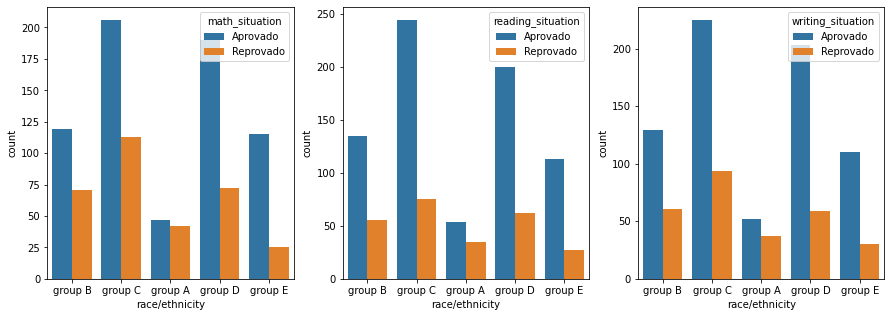

In [21]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='race/ethnicity', data=df, hue='math_situation', ax=axes[0])
sns.countplot(x='race/ethnicity', data=df, hue='reading_situation', ax=axes[1])
sns.countplot(x='race/ethnicity', data=df, hue='writing_situation', ax=axes[2])

plt.tight_layout;

Podemos observar que os grupos C e D apresentam maior número de aprovados.

Com a análise desenvolvida até o momento (podendo melhorar futuramente na medida que for aprenendo como manipular as features), quais as respostas para as perguntas feitas inicialmente?
1. Qual eficaz é o curso de preparação para o teste ?
R. O curso de preparação aprova, pelo menos, 75% dos alunos que o concluiram, apresentando uma boa eficácia.

2. Quais os principais fatores que contribuem para os resultados dos testes ?
R. Até então, o aluno que possuir pais com grau de escolaridade "some college" e "associate's degree", e pertecentes aos grupos de raça/etinia C e D.

3. Qual seria a melhor forma de melhorar as notas dos alunos em cada teste ?
R. Certamente fazer com que os alunos completem o curso de preparação.